## Контест 1

Выполнил: Концебалов Олег Сергеевич

Группа: М8О-309Б-22

### Linear Regression

Подключаем необходимые библиотеки для обучения модели

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Устанавливаем опции для Pandas

In [ ]:
pd.set_option("display.precision", 2)

Загружаем наши датасеты, на которых будем обучать модель

In [ ]:
df_train = pd.read_csv("/kaggle/input/mai-ml-contest-1/train.csv")

df_train.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.26,0.25,508.97,0.29,0.0,66.18
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.09,0.09,514.68,0.05,1.0,28.50
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.11,0.12,1268.28,0.07,1.0,34.49
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.10,0.11,498.51,0.23,1.0,36.91
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.11,0.09,756.04,0.05,1.0,31.35


In [ ]:
df_test = pd.read_csv("/kaggle/input/mai-ml-contest-1/test.csv")

df_test.head()

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,6,Employed,High School,23,10626,0.10,0.13,325.53,0.04,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,3,Employed,High School,3,299024,0.23,0.26,2210.25,0.45,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,3,Employed,High School,19,6979,0.15,0.15,403.98,0.03,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,3,Self-Employed,Bachelor,26,8438,0.12,0.10,1571.95,0.09,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,7,Employed,Associate,12,436216,0.23,0.24,1486.68,0.06,1


Посмотрим на Целевую Переменную


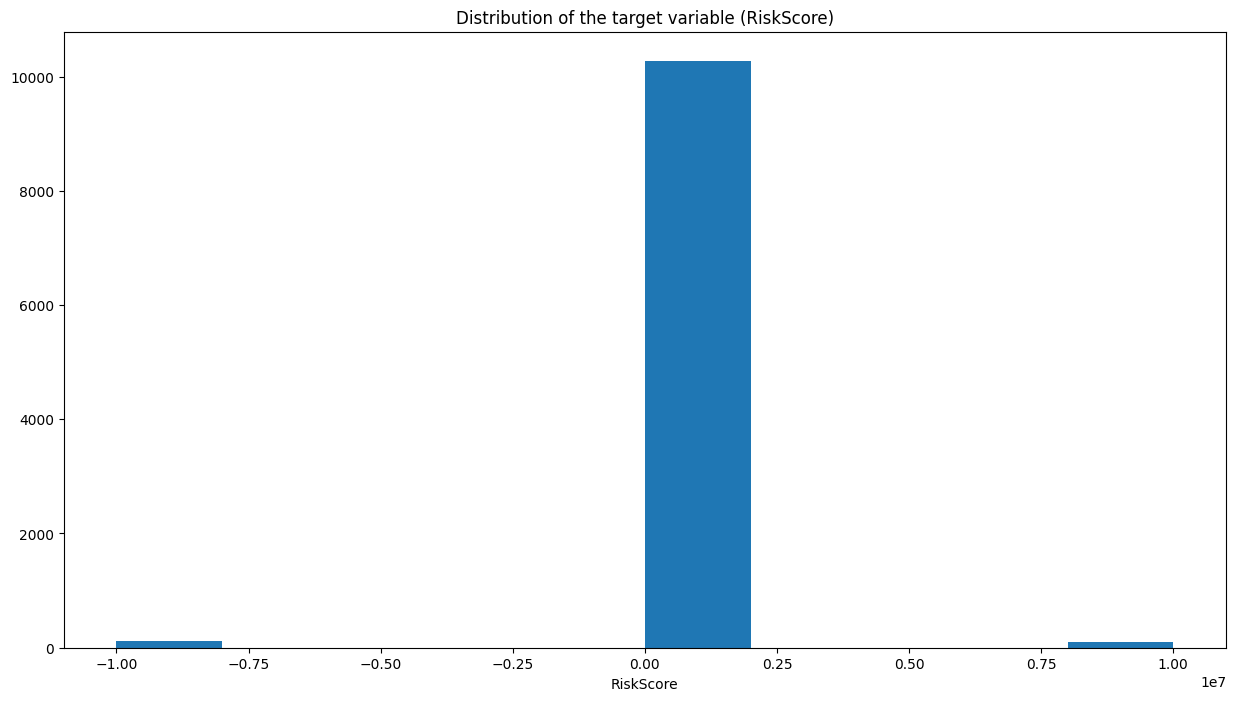

In [ ]:
def show_target_var() -> None:
  target_var = df_train['RiskScore']

  plt.figure(figsize=(15, 8))
  plt.hist(target_var)
  plt.title("Distribution of the target variable (RiskScore)")
  plt.xlabel("RiskScore")

  plt.show()


show_target_var()

Видим, что у нас присутствуют выбросы в краевых случая: 1% < и > 99%

Просто отсекаем эти значения

In [ ]:
df_train = df_train[
    (df_train['RiskScore'] > df_train['RiskScore'].quantile(0.01)) &
    (df_train['RiskScore'] < df_train['RiskScore'].quantile(0.99))
    ]

Посмотрим как теперь выгляит распределение нашей целевой переменной


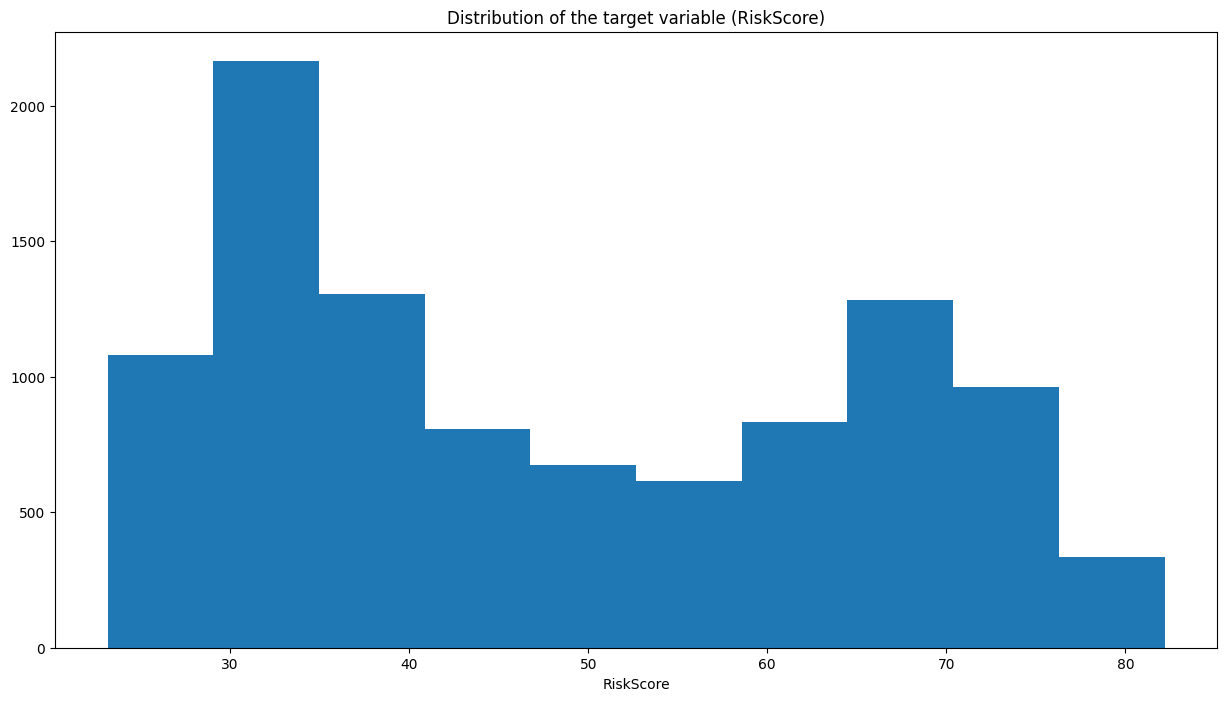

In [ ]:
show_target_var()

Посмотрим на категориальные признаки

In [ ]:
categorial_features = df_train.select_dtypes(object).columns

for feature in categorial_features:
  print(f'{feature} : {df_train[feature].unique()}')

ApplicationDate : ['2010-06-26' '1996-09-23' '2015-01-19' ... '2010-04-05' '2010-11-07'
 '2001-12-28']
MaritalStatus : ['Divorced' 'Widowed' 'Married' 'Single']
HomeOwnershipStatus : ['Rent' 'Mortgage' 'Other' 'Own']
LoanPurpose : ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other' nan]
EmploymentStatus : ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel : ['Associate' 'High School' 'Bachelor' 'Doctorate' 'Master']


Посмотрим как они влияют на целевую переменную

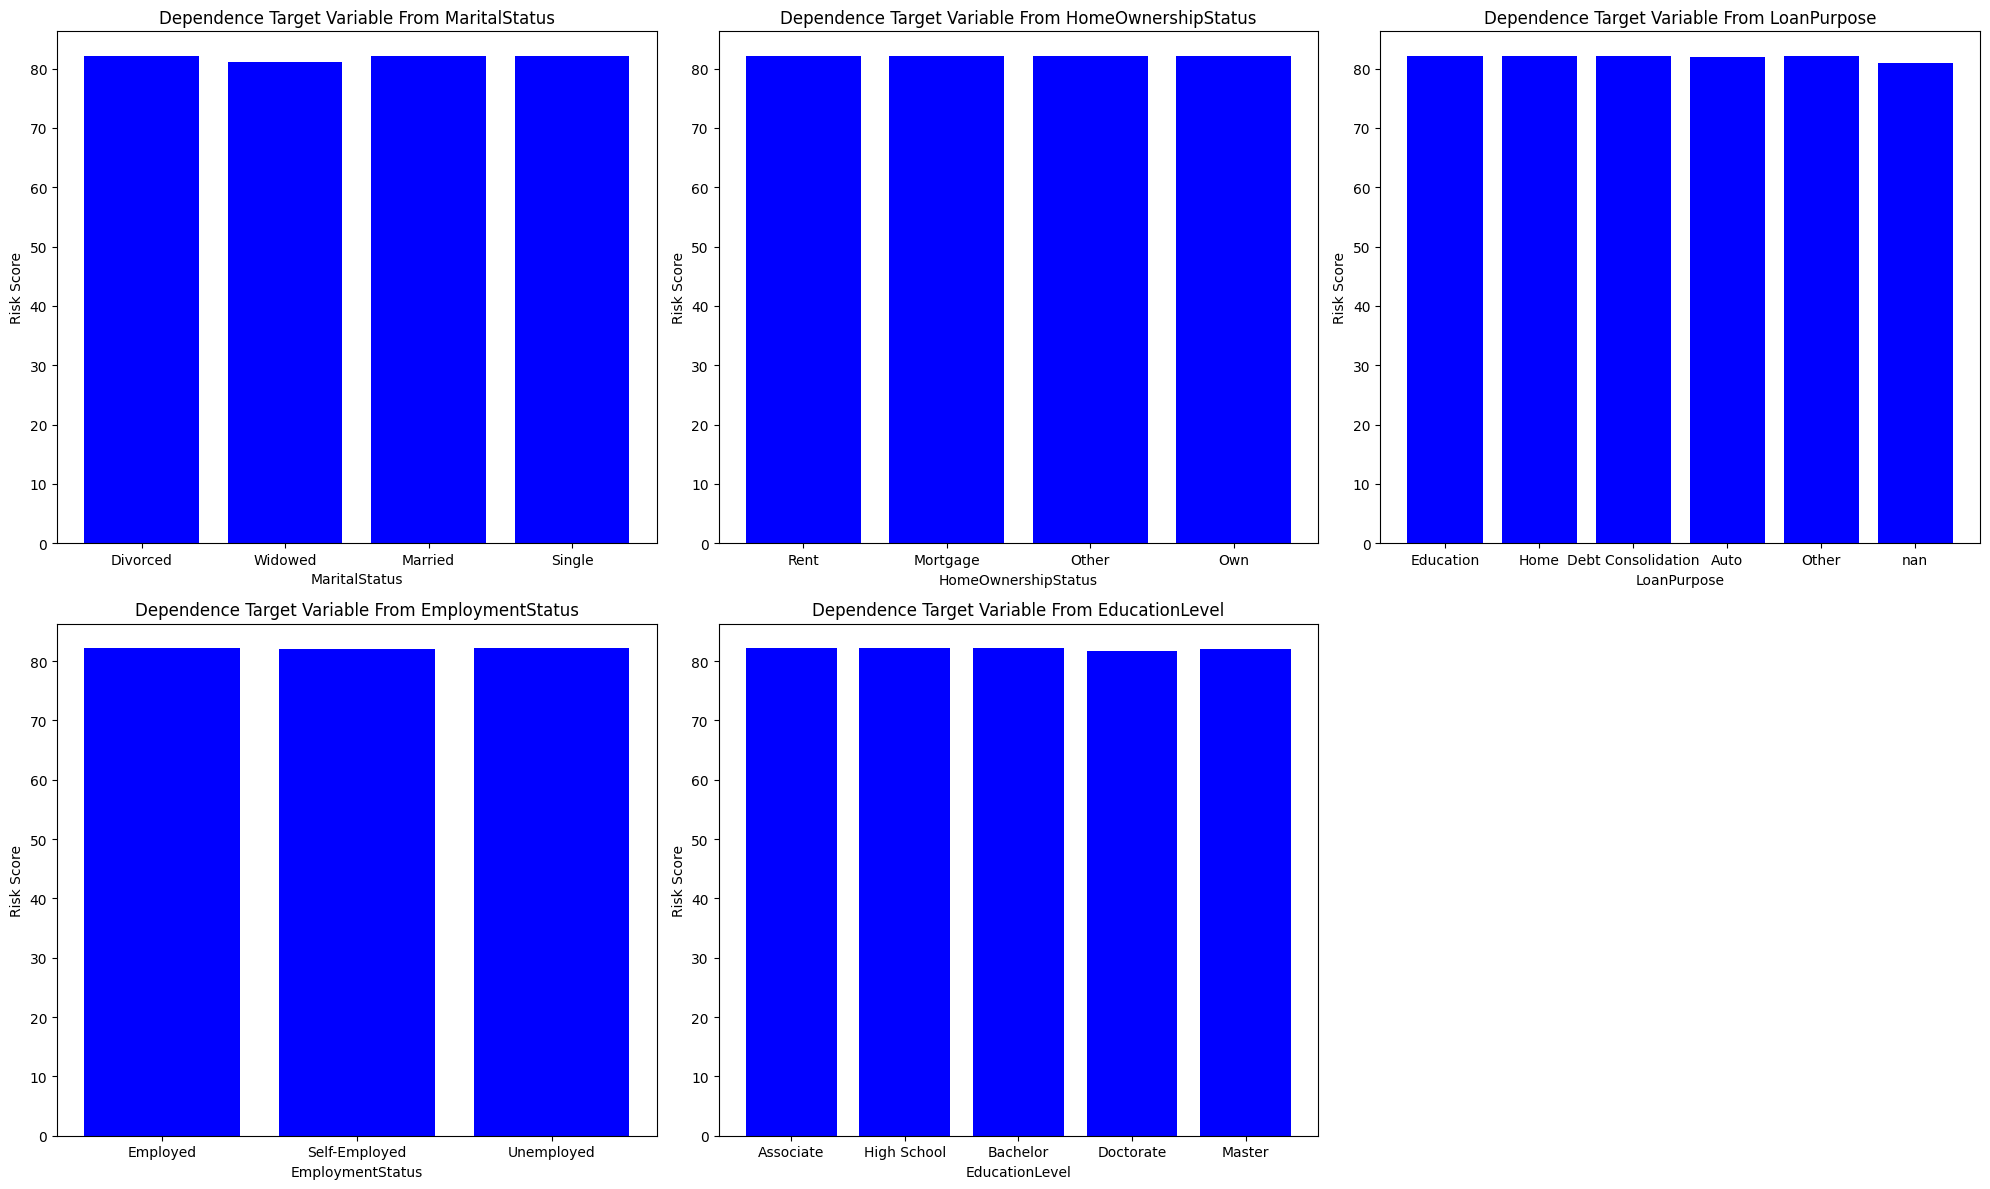

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.bar(df_train['MaritalStatus'], df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From MaritalStatus")
plt.xlabel("MaritalStatus")
plt.ylabel("Risk Score")

plt.subplot(2, 3, 2)
plt.bar(df_train['HomeOwnershipStatus'], df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From HomeOwnershipStatus")
plt.xlabel("HomeOwnershipStatus")
plt.ylabel("Risk Score")

plt.subplot(2, 3, 3)
plt.bar(df_train['LoanPurpose'].astype(str), df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From LoanPurpose")
plt.xlabel("LoanPurpose")
plt.ylabel("Risk Score")

plt.subplot(2, 3, 4)
plt.bar(df_train['EmploymentStatus'], df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From EmploymentStatus")
plt.xlabel("EmploymentStatus")
plt.ylabel("Risk Score")

plt.subplot(2, 3, 5)
plt.bar(df_train['EducationLevel'], df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From EducationLevel")
plt.xlabel("EducationLevel")
plt.ylabel("Risk Score")

plt.tight_layout()
plt.show()


Видим, что MaritalStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus и EducationLevel практически не влияют на целевую переменную Risk Score. Поэтому можем их спокойно удалить

In [ ]:
df_train.drop(
    [
      'MaritalStatus',
      'HomeOwnershipStatus',
      'LoanPurpose',
      'EmploymentStatus',
      'EducationLevel'
      ],
    axis=1,
    inplace=True
    )

Достанем из даты год, месяц и день и положим из в отдельные признаки

In [ ]:
df_train['ApplicationDate'] = pd.to_datetime(df_train['ApplicationDate'])

df_train['day'] = df_train['ApplicationDate'].dt.day
df_train['month'] = df_train['ApplicationDate'].dt.month
df_train['year'] = df_train['ApplicationDate'].dt.year

Теперь посмотрим как они влияют на целевую переменную

Text(0, 0.5, 'Risk Score')

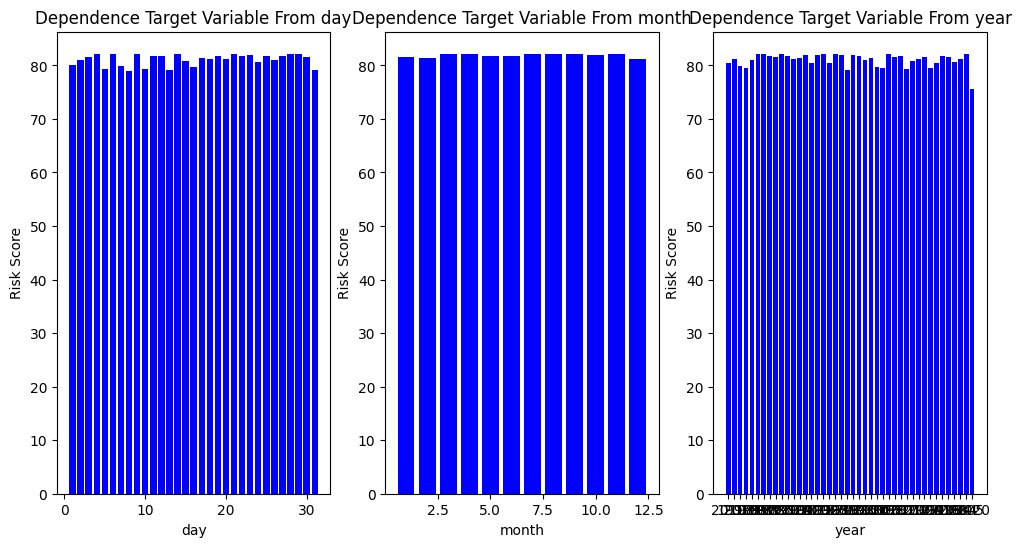

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(df_train['day'], df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From day")
plt.xlabel("day")
plt.ylabel("Risk Score")

plt.subplot(1, 3, 2)
plt.bar(df_train['month'], df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From month")
plt.xlabel("month")
plt.ylabel("Risk Score")

plt.subplot(1, 3, 3)
plt.bar(df_train['year'].astype(str), df_train['RiskScore'], color='blue')
plt.title("Dependence Target Variable From year")
plt.xlabel("year")
plt.ylabel("Risk Score")

Видим, что особого влияния они также не оказывают.

Поэтому удаляем day, month, year, а также ApplicationDate

In [ ]:
df_train.drop(
    [
      'day',
      'month',
      'year',
      'ApplicationDate'
      ],
    axis=1,
    inplace=True
    )

Не забудем удалить столбцы из тестовой выборки

In [ ]:
df_test.drop(
    [
      'MaritalStatus',
      'HomeOwnershipStatus',
      'LoanPurpose',
      'EmploymentStatus',
      'EducationLevel',
      'ApplicationDate'
      ],
    axis=1,
    inplace=True
    )

Заполним пропуски средними значениями для каждого из столбцов

In [ ]:
df_train = df_train.fillna(df_train.mean())

Разделим датасет для обучения на переменные и истинное значение целевой переменной

In [ ]:
X_train = df_train.loc[:, df_train.columns != 'RiskScore']
y_train = df_train['RiskScore']

Обучим модель на тренировочном датасете

In [ ]:
sk_reg = LinearRegression()
sk_reg.fit(X_train, y_train)

LinearRegression()

Предскажем с помощью полученной модели целевые значения для тестовой выборки и занесем из в csv файл

In [ ]:
X_test = df_test.drop(columns=['ID'], errors='ignore')
y_pred = sk_reg.predict(X_test)

with open('submission.csv', 'w') as file:
    file.write("ID,RiskScore\n")

    test_id = df_test['ID']

    for id, pred in zip(test_id, y_pred):
        file.write(f"{id},{pred}\n")